# Doing analysis on the E-commerce dataset 

In [1]:
# importing basic packages
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# 1.Customer Segementation based on the basis of the Buying Pattern

In [2]:
# importing the dataset
data = pd.read_excel('Ecommerce_business.xlsx')

In [3]:
# function to get the basic info about the data set
def data_info(data):
    print('checking for the shape of the dataset')
    print(data.shape)
    print('*'*10)
    print('checking for the missing values rate')
    print(data.isna().sum()/len(data)*100)
    print('*'*10)
    print('descriptive_analysis of the dateset')
    print(data.describe)
    print('*'*10)
    

In [4]:
data_info(data)

checking for the shape of the dataset
(541909, 9)
**********
checking for the missing values rate
Invoice_No           0.000000
Item_Code            0.000000
lower_floor         99.664888
Item_Description     0.268311
Quantity             0.000000
InvoiceDate          0.000000
UnitPrice            0.000000
CustomerID          24.926694
Country              0.000000
dtype: float64
**********
descriptive_analysis of the dateset
<bound method NDFrame.describe of        Invoice_No Item_Code                          lower_floor  \
0          536365    85123A   white hanging heart t-light holder   
1          536365     71053                  white metal lantern   
2          536365    84406B       cream cupid hearts coat hanger   
3          536365    84029G  knitted union flag hot water bottle   
4          536365    84029E       red woolly hottie white heart.   
...           ...       ...                                  ...   
541904     581587     22613                                 

In [5]:
data.head(4)

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# missing values treatment
# as from the above results lower_floor,CustomerId is having the missing so we can drop it
# as the lower_floor column is having 99% missing data so dropit
data.drop('lower_floor',axis=1,inplace=True)

In [7]:
# as the customer is the siginfacant value so we cant impute it drop rows
data.dropna(inplace=True)

In [8]:
data.shape

(406829, 8)

In [9]:
# check for missing values if there 
data.isna().sum()

Invoice_No          0
Item_Code           0
Item_Description    0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

In [10]:
# missing values treatment done

In [11]:
data.head()

,Invoice_No,Item_Code,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
# drop the unnecessary columns which are not siginfacant clustering of the customers 
cols_not_necessary =  ['Item_Description','Item_Code','Country']
# function to drop the unnecassary columns
def droping_cols(cols,dataset):
    dataset.drop(columns=cols,axis=1,inplace=True)

In [13]:
# function calling
droping_cols(cols_not_necessary,data)

In [14]:
data.head(10)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,32,2010-12-01 08:34:00,1.69,13047.0


In [15]:
# descriptive statsitcs on the data set
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
data['Quantity'] = np.where(data['Quantity']<0,0,data['Quantity'])

In [17]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.736791,3.460471,15287.690570
std,178.444861,69.315162,1713.600303
min,0.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
# checking for the products whose unit price is 0
data[data['UnitPrice']==0].value_counts().sum()

40

In [19]:
# data frame of the products which are free
data[data['UnitPrice']==0].head(50)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [20]:
# lets caluclate the total_price that helps in monotory calculation
data['Total_Price'] =  data['Quantity']*data['UnitPrice']

In [21]:
data.head()

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [22]:
data.head(3)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00


In [23]:
data.head(3)

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00


In [24]:
# as we calucalted the Total_price so the quantity,unitprice are not significant so drop those columns
data1 = data.drop(columns=['Quantity','UnitPrice'],axis=1,inplace=True)

In [25]:
data.head()

,Invoice_No,InvoiceDate,CustomerID,Total_Price
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [26]:
data.head(15)

,Invoice_No,InvoiceDate,CustomerID,Total_Price
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
5,536365,2010-12-01 08:26:00,17850.0,15.30
6,536365,2010-12-01 08:26:00,17850.0,25.50
7,536366,2010-12-01 08:28:00,17850.0,11.10
8,536366,2010-12-01 08:28:00,17850.0,11.10
9,536367,2010-12-01 08:34:00,13047.0,54.08


In [27]:
# as the data is ready enough for the further analysis
df_final=data.groupby(["Invoice_No","InvoiceDate","CustomerID"]).agg({"Total_Price":"sum"}).reset_index()

In [28]:
df_final.head(20)

,Invoice_No,InvoiceDate,CustomerID,Total_Price
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
5,536370,2010-12-01 08:45:00,12583.0,855.86
6,536371,2010-12-01 09:00:00,13748.0,204.00
7,536372,2010-12-01 09:01:00,17850.0,22.20
8,536373,2010-12-01 09:02:00,17850.0,259.86
9,536374,2010-12-01 09:09:00,15100.0,350.40


# goal 1  that we have to segregate based on the OR BY USING THE RFM approch

In [29]:
# step-1 calucaltion of the R---> recency
# recency can be calculated by the from the last no of days the customer has not visted the store
# the recency can be calculated by the using of InvoiceDate column
max_date =  max(df_final['InvoiceDate'])
# max_date gives the last working day of the store
min_date = min(df_final['InvoiceDate'])
# min_date gives the starting working day of the store
print(f'max_date is ',max_date)
print('max_date is ',min_date)

max_date is  2011-12-09 12:50:00
max_date is  2010-12-01 08:26:00


In [30]:
# add 1 date to the max date to calucalte the recency of the customer

In [31]:
import datetime as dt
last_date = dt.datetime(2011,12,10)
print(last_date)

2011-12-10 00:00:00


In [32]:
# calucatalion of the RFM score 
# keeping the customer id as the referesnce we can calculate the RFM scoe

In [33]:
# grouping the date based on the customer_id
RFM =  df_final.groupby('CustomerID').agg({"InvoiceDate":lambda x:(last_date-x.max()).days,
                                             "Invoice_No":lambda x:x.count(),
                                             "Total_Price":lambda x:x.sum()}).reset_index()

In [34]:
RFM

,CustomerID,InvoiceDate,Invoice_No,Total_Price
0,12346.0,325,2,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,178.05
4370,18283.0,3,16,2094.88


In [35]:
rfmscore=RFM.rename(columns={'InvoiceDate':'Recency','Invoice_No':'Frequency','Total_Price':'Monetory'})

In [36]:
rfmscore

,CustomerID,Recency,Frequency,Monetory
0,12346.0,325,2,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,178.05
4370,18283.0,3,16,2094.88


In [37]:
quantiles = rfmscore.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 13812.75, 0.5: 15300.5, 0.75: 16778.25},
 'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetory': {0.25: 303.60249999999996, 0.5: 665.315, 0.75: 1652.79}}

In [38]:
def RScore(x, p, d):
    if x<=d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScore(x, p, d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else:
        return 1

In [39]:
rfmscore['R'] = rfmscore['Recency'].apply(RScore, args=('Recency', quantiles))
rfmscore['F'] = rfmscore['Frequency'].apply(FnMScore, args=('Frequency', quantiles))
rfmscore['M'] = rfmscore['Monetory'].apply(FnMScore, args=('Monetory', quantiles))

In [40]:
rfmscore

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,12346.0,325,2,77183.60,4,3,1
1,12347.0,2,7,4310.00,1,1,1
2,12348.0,75,4,1797.24,3,2,1
3,12349.0,18,1,1757.55,2,4,1
4,12350.0,310,1,334.40,4,4,3
...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,4,4,4
4368,18281.0,180,1,80.82,4,4,4
4369,18282.0,7,3,178.05,1,3,4
4370,18283.0,3,16,2094.88,1,1,1


In [41]:
# total RFM score
# if the sum is  3 is best
# if the sum is max of 12 is worst customer

In [42]:
rfmscore['RFM_Sum'] = rfmscore['R']+rfmscore['F']+rfmscore['M']

In [43]:
rfmscore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_Sum
0,12346.0,325,2,77183.60,4,3,1,8
1,12347.0,2,7,4310.00,1,1,1,3
2,12348.0,75,4,1797.24,3,2,1,6
3,12349.0,18,1,1757.55,2,4,1,7
4,12350.0,310,1,334.40,4,4,3,11
...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,4,4,4,12
4368,18281.0,180,1,80.82,4,4,4,12
4369,18282.0,7,3,178.05,1,3,4,8
4370,18283.0,3,16,2094.88,1,1,1,3


In [44]:
# do the clustering of the customers based on the RFM_Sum
Loyality_Level = ['Prime','Diamond','Gold','Silver']
score_cuts = pd.qcut(rfmscore.RFM_Sum, q=4, labels = Loyality_Level)
rfmscore['Loyality_Level'] = score_cuts.values
rfmscore = rfmscore.reset_index()
rfmscore

,index,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_Sum,Loyality_Level
0,0,12346.0,325,2,77183.60,4,3,1,8,Diamond
1,1,12347.0,2,7,4310.00,1,1,1,3,Prime
2,2,12348.0,75,4,1797.24,3,2,1,6,Diamond
3,3,12349.0,18,1,1757.55,2,4,1,7,Diamond
4,4,12350.0,310,1,334.40,4,4,3,11,Silver
...,...,...,...,...,...,...,...,...,...,...
4367,4367,18280.0,277,1,180.60,4,4,4,12,Silver
4368,4368,18281.0,180,1,80.82,4,4,4,12,Silver
4369,4369,18282.0,7,3,178.05,1,3,4,8,Diamond
4370,4370,18283.0,3,16,2094.88,1,1,1,3,Prime


In [45]:
# checking the value counts
rfmscore['Loyality_Level'].value_counts()

Diamond    1241
Prime      1226
Gold       1025
Silver      880
Name: Loyality_Level, dtype: int64

In [46]:
# saving the data 
customer_data = pd.DataFrame(rfmscore,columns=['CustomerID','Loyality_Level'])

In [47]:
# saving to csv file
customer_data.to_csv('customer_data.csv')


# 2.Bussiness Trend ---> checking on which the business is very busy and buying patterns

In [48]:
dataset = data.copy()


In [49]:
dataset.head()

,Invoice_No,InvoiceDate,CustomerID,Total_Price
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [50]:
# goal is to determine the bussiness hours and buying patterns

In [51]:
# at first check on the day wise which the sales 
# invoicedate helps to do this
pd.to_datetime(dataset['InvoiceDate'])
# check for the  date type of columns
data.dtypes

Invoice_No             object
InvoiceDate    datetime64[ns]
CustomerID            float64
Total_Price           float64
dtype: object

In [52]:
# let us get the day,month year
dataset['year'] = dataset['InvoiceDate'].dt.year
# monday ----> 0 and sunday ----> 6
dataset['Day'] = dataset['InvoiceDate'].dt.dayofweek
dataset['Month'] = dataset['InvoiceDate'].dt.month
# to get the bussiness hrs to see the trends
dataset['Hr'] = dataset['InvoiceDate'].dt.hour

In [53]:
dataset

,Invoice_No,InvoiceDate,CustomerID,Total_Price,year,Day,Month,Hr
0,536365,2010-12-01 08:26:00,17850.0,15.30,2010,2,12,8
1,536365,2010-12-01 08:26:00,17850.0,20.34,2010,2,12,8
2,536365,2010-12-01 08:26:00,17850.0,22.00,2010,2,12,8
3,536365,2010-12-01 08:26:00,17850.0,20.34,2010,2,12,8
4,536365,2010-12-01 08:26:00,17850.0,20.34,2010,2,12,8
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,10.20,2011,4,12,12
541905,581587,2011-12-09 12:50:00,12680.0,12.60,2011,4,12,12
541906,581587,2011-12-09 12:50:00,12680.0,16.60,2011,4,12,12
541907,581587,2011-12-09 12:50:00,12680.0,16.60,2011,4,12,12


In [54]:
# customerid,day is not signifacant
# dataset.drop(columns=['CustomerID','day'],axis=1,inplace=True)

In [55]:
dataset.head(4)

,Invoice_No,InvoiceDate,CustomerID,Total_Price,year,Day,Month,Hr
0,536365,2010-12-01 08:26:00,17850.0,15.30,2010,2,12,8
1,536365,2010-12-01 08:26:00,17850.0,20.34,2010,2,12,8
2,536365,2010-12-01 08:26:00,17850.0,22.00,2010,2,12,8
3,536365,2010-12-01 08:26:00,17850.0,20.34,2010,2,12,8


In [56]:
# now its time to to alaysis the sales trend weekly ,busy hrs
weekly_sales = dataset.groupby('Day')['Total_Price'].sum().reset_index()
weekly_sales

,Day,Total_Price
0,0,1367146.411
1,1,1700634.631
2,2,1588336.170
3,3,1976859.070
4,4,1485917.401
5,6,792514.221


In [57]:
# check business hrs  at which time the sales are busy
busy_hrs = dataset.groupby('Hr')['Total_Price'].sum().reset_index()
busy_hrs

,Hr,Total_Price
0,6,4.250
1,7,31059.210
2,8,282115.630
3,9,842605.171
4,10,1261192.571
5,11,1104558.750
6,12,1378571.480
7,13,1173264.750
8,14,995629.371
9,15,966191.750


In [58]:
# to check sales monthly patterns
monthly_sales = dataset.groupby('Month')['Total_Price'].sum().reset_index()
monthly_sales

,Month,Total_Price
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,645343.900
8,9,952838.382
9,10,1039318.790


In [59]:
# see the year wise
yearly_sales = dataset.groupby('year')['Total_Price'].sum().reset_index()
yearly_sales

,year,Total_Price
0,2010,572713.890
1,2011,8338694.014


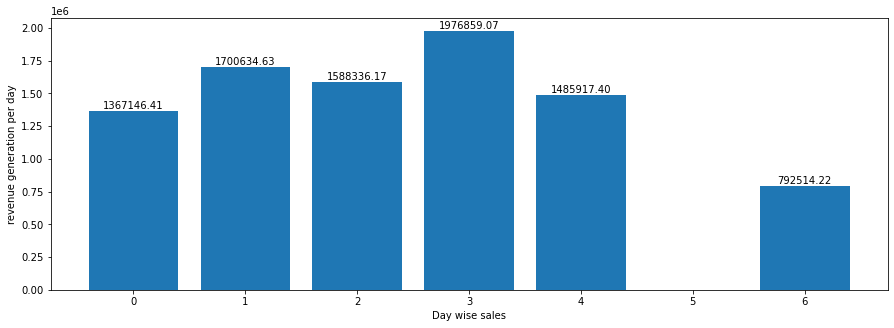

In [70]:
# do the eda on the data
# check day wise sales
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(weekly_sales['Day'],weekly_sales['Total_Price'])
plt.xlabel('Day wise sales')
plt.ylabel('revenue generation per day')
for x, y in zip(weekly_sales['Day'],weekly_sales['Total_Price']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.show()


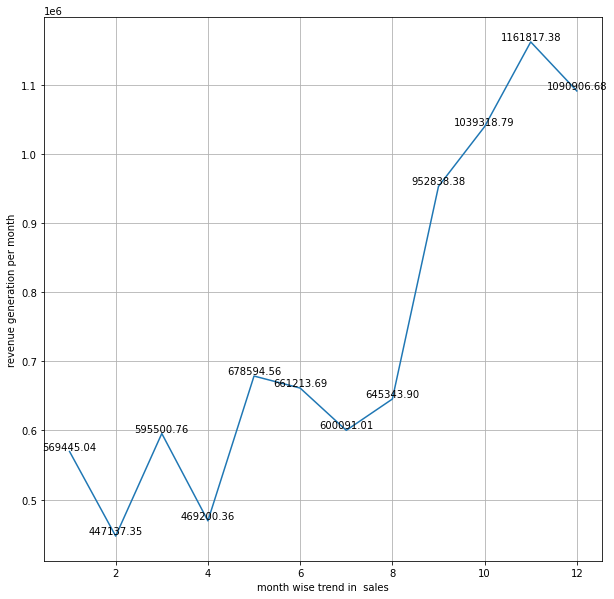

In [74]:
plt.figure(figsize=(10,10))
plt.plot(monthly_sales['Month'],monthly_sales['Total_Price'])
plt.xlabel('month wise trend in  sales')
plt.ylabel('revenue generation per month')
plt.grid()
for x, y in zip(monthly_sales['Month'],monthly_sales['Total_Price']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.show()





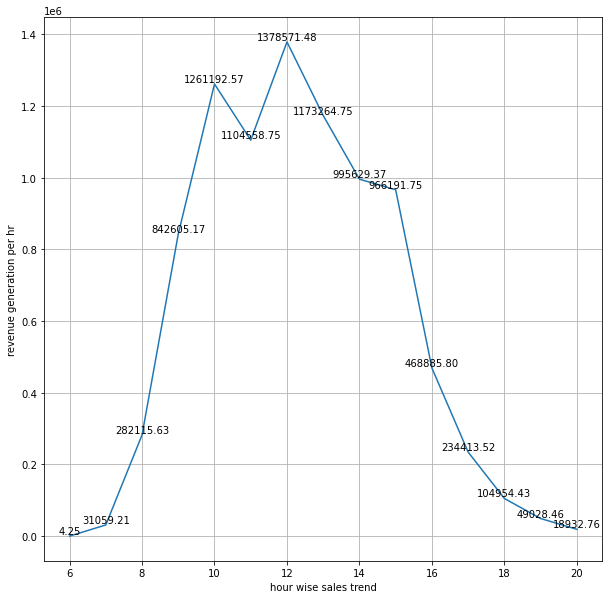

In [77]:
plt.figure(figsize=(10,10))
plt.plot(busy_hrs['Hr'],busy_hrs['Total_Price'])
plt.xlabel('hour wise sales trend')
plt.ylabel('revenue generation per hr')
for x, y in zip(busy_hrs['Hr'],busy_hrs['Total_Price']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.grid()
plt.show()

# report

# 3.Best performence product

In [178]:
df3 = pd.read_excel('Ecommerce_business.xlsx')

In [179]:
df3.head(5)

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [180]:
df4 = df3.copy()

In [181]:
# dro the unnecassary columns that are not required to check for the best performence product
df4.drop(columns=['lower_floor','CustomerID','Country','Invoice_No','InvoiceDate'],axis=1,inplace=True)

In [182]:
df4.head(3)

,Item_Code,Item_Description,Quantity,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,71053,WHITE METAL LANTERN,6,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75


In [183]:
# to check the popular product based on the itemcode count
popular=df4['Item_Code'].value_counts()
popular.head(4)

85123A    2313
22423     2203
85099B    2159
47566     1727
Name: Item_Code, dtype: int64

In [184]:
# checking for the top 5 products
print(popular.head(5))
# checking for the least 5 saled products
print('*'*8)
print(popular.tail(5))

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: Item_Code, dtype: int64
********
21431     1
22275     1
17001     1
90187A    1
72759     1
Name: Item_Code, dtype: int64


In [185]:
item_des = df3['Item_Description'].value_counts()

In [186]:
# creating dataframepopular
popular_data = pd.DataFrame(popular)

In [187]:
popular_data

,Item_Code
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
...,...
21431,1
22275,1
17001,1
90187A,1


In [188]:
# /save the dataframe 
popular_data.to_csv('popular_item.csv')


In [201]:
# checking the product that producing more in terms of montroy wise
df4['Total_Price'] =  df4['Quantity'] * df4['UnitPrice']

In [202]:
df4.isnull().sum()

Item_Code              0
Item_Description    1454
Quantity               0
UnitPrice              0
Total_Price            0
dtype: int64

In [203]:
data5 = df4.groupby('Item_Code')['Total_Price'].sum()

# 4.country wise best product

In [206]:
# we have to check the country wise product
df5 = df3.copy()
# Group by 'Country' and 'Item_Code' and sum the 'Quantity'
grouped = df5.groupby(['Country', 'Item_Code']).agg({'Quantity': 'sum'}).reset_index()

# Find the item with the highest quantity for each country
popular_products = grouped.loc[grouped.groupby('Country')['Quantity'].idxmax()]

# Merge with the original dataframe to get item descriptions (optional)
popular_products = popular_products.merge(df5[['Item_Code', 'Item_Description']].drop_duplicates(), on='Item_Code', how='left')

pd.DataFrame(popular_products)


,Country,Item_Code,Quantity,Item_Description
0,Australia,22492,2916,MINI PAINT SET VINTAGE
1,Austria,21918,288,SET 12 KIDS COLOUR CHALK STICKS
2,Austria,21918,288,NaN
3,Bahrain,23076,96,ICE CREAM SUNDAE LIP GLOSS
4,Belgium,21212,480,PACK OF 72 RETROSPOT CAKE CASES
...,...,...,...,...
80,United Arab Emirates,21700,72,NaN
81,United Arab Emirates,21700,72,check
82,United Kingdom,22197,52928,SMALL POPCORN HOLDER
83,United Kingdom,22197,52928,POPCORN HOLDER


In [208]:
# top 10 products popular
popular_products.head(10)

,Country,Item_Code,Quantity,Item_Description
0,Australia,22492,2916,MINI PAINT SET VINTAGE
1,Austria,21918,288,SET 12 KIDS COLOUR CHALK STICKS
2,Austria,21918,288,NaN
3,Bahrain,23076,96,ICE CREAM SUNDAE LIP GLOSS
4,Belgium,21212,480,PACK OF 72 RETROSPOT CAKE CASES
5,Brazil,21430,24,SET/3 RED GINGHAM ROSE STORAGE BOX
6,Canada,37370,504,RETRO COFFEE MUGS ASSORTED
7,Canada,37370,504,sold as set/6 by dotcom
8,Canada,37370,504,damages/dotcom?
9,Canada,37370,504,NaN


# 5..Customer Life Time evalution 

In [234]:
df6 = df3.copy()

In [235]:
df6.isna().sum()

Invoice_No               0
Item_Code                0
lower_floor         540093
Item_Description      1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
dtype: int64

In [236]:
# as the lower_floor,CustomerID is having null values drop it
df6.drop(columns=['lower_floor'],axis=1,inplace=True)

In [237]:
df6.drop(columns=['Item_Description'],axis=1,inplace=True)

In [240]:
df6.dropna(subset=['CustomerID'], inplace=True)

In [241]:
df6.isna().sum()

Invoice_No     0
Item_Code      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [249]:
# Calculate total revenue per customer
df6['Revenue'] = df6['Quantity'] * df6['UnitPrice']
customer_revenue = df6.groupby('CustomerID')['Revenue'].sum().reset_index()

# Calculate number of purchases per customer
customer_purchases = df6.groupby('CustomerID')['Invoice_No'].count().reset_index()
customer_purchases.columns = ['CustomerID', 'Number_of_Purchases']

# Merge the dataframes
customer_data = pd.merge(customer_revenue, customer_purchases, on='CustomerID')

# Calculate average purchase value
customer_data['Average_Purchase_Value'] = customer_data['Revenue'] / customer_data['Number_of_Purchases']

# Calculate purchase frequency (assuming df['CustomerID'].nunique() gives the number of unique customers)
customer_data['Purchase_Frequency'] = customer_data['Number_of_Purchases'] / df6['CustomerID'].nunique()

# Assuming an average customer lifespan (this needs to be calculated based on your data)
average_customer_lifespan = 3  # For example, 3 years

# Calculate CLTV
customer_data['CLTV'] = customer_data['Average_Purchase_Value'] * customer_data['Purchase_Frequency'] * average_customer_lifespan

# Identify the best customer
best_customer = customer_data.loc[customer_data['CLTV'].idxmax()]

print("Best Customer based on CLTV:")
print(best_customer)


Best Customer based on CLTV:
CustomerID                 14646.000000
Revenue                   279489.020000
Number_of_Purchases         2085.000000
Average_Purchase_Value       134.047492
Purchase_Frequency             0.476898
CLTV                         191.781121
Name: 1703, dtype: float64


# 6.Recommondation Engine

In [250]:
df7 = df3.copy()

In [251]:
df7 = 

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,NaN,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,NaN,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,NaN,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,NaN,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [252]:
df7.dropna(axis=0,inplace=True)

In [253]:
df7.isna().sum()

Invoice_No          0
Item_Code           0
lower_floor         0
Item_Description    0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

In [254]:
custID_matrix=df7.pivot_table(index="CustomerID",columns="Item_Code",values="Quantity",aggfunc="sum")

In [255]:
custID_matrix

Item_Code,10002,10125,10133,16014,16016,16237,16238,17021,20668,20669,...,90185C,90199C,90200A,90200B,90200C,90200D,90210B,C2,D,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12583.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12662.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17968.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN
18074.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)

In [257]:
custID_matrix.head(10)

Item_Code,10002,10125,10133,16014,16016,16237,16238,17021,20668,20669,...,90185C,90199C,90200A,90200B,90200C,90200D,90210B,C2,D,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12431.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12433.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12583.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12662.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12748.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12791.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12838.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12868.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13047.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(custID_matrix)

In [275]:
similarity

array([[1.        , 0.        , 0.17928429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05234239, ..., 0.        , 0.03901372,
        0.        ],
       [0.17928429, 0.05234239, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03901372, 0.        , ..., 0.        , 1.        ,
        0.19245009],
       [0.        , 0.        , 0.        , ..., 0.        , 0.19245009,
        1.        ]])

In [280]:
sorted(similarity[60],reverse=True)

[1.0000000000000004,
 0.1796053020267749,
 0.1636783307407345,
 0.13576884666042613,
 0.1353825902684706,
 0.1270001270001905,
 0.12220592918446108,
 0.10998533626601499,
 0.10369516947304254,
 0.10369516947304254,
 0.08712136837380642,
 0.08351476906593233,
 0.08032193289024989,
 0.06788442333021306,
 0.056796183424706485,
 0.049813548138671795,
 0.048001536073731935,
 0.046373889576016826,
 0.04490132550669373,
 0.04356068418690321,
 0.04356068418690321,
 0.04233337566673017,
 0.03919309008348103,
 0.03829197905337418,
 0.03456505649101418,
 0.03225806451612904,
 0.026481357066618805,
 0.025923792368260635,
 0.02162193750322053,
 0.02102121059172125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [281]:
customer=pd.DataFrame(similarity,columns=custID_matrix.index)

In [282]:
customer=customer.set_index(custID_matrix.index)

In [292]:
item_cust_A=set(custID_matrix.loc[12662].iloc[custID_matrix.loc[12748].to_numpy().nonzero()].index)

In [287]:
item_cust_A

{10002,
 21035,
 21724,
 21731,
 21791,
 21883,
 21913,
 22326,
 22492,
 22540,
 22544,
 22629,
 22631,
 22659,
 22661,
 22726,
 22727,
 22728,
 22900,
 'POST'}

In [294]:
item_cust_B=set(custID_matrix.loc[12748].iloc[custID_matrix.loc[12748].to_numpy().nonzero()].index)

In [295]:
item_cust_B

{22854}

In [298]:
ITEM_A=df7.loc[df7["Item_Code"].isin(item_cust_A),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [299]:
ITEM_A

,Item_Description
Item_Code,
22854,CREAM SWEETHEART EGG HOLDER


In [300]:
ITEM_B=df7.loc[df7["Item_Code"].isin(item_cust_B),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [301]:
Recommended_for_A=item_cust_B-item_cust_A

In [302]:
Recommended_for_A

set()